## Importing needed libraries and loading the needed data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Data Analysis and Data Exploration

In [3]:
df['species'].unique() #3 types of species within a iris flower

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
df['species'] = df['species'].apply(lambda x: x[5:]) #chopping off iris- in the species column

In [5]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
df_s = df[df['species']=='setosa']
df_ve = df[df['species']=='versicolor']
df_vi = df[df['species']=='virginica']

In [7]:
df.isna().sum().sum(),df.duplicated().sum().sum() # seems we have no null values but we have 3 duplicates

(0, 3)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.isna().sum().sum(),df.duplicated().sum().sum() # seems we have no null values but we have 3 duplicates

(0, 0)

In [10]:
df_s.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


In [11]:
df_ve.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [12]:
df_vi.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


In [13]:
df_s['sepal_length'].mean(),df_ve['sepal_length'].mean(),df_vi['sepal_length'].mean()

(5.006, 5.936, 6.587999999999998)

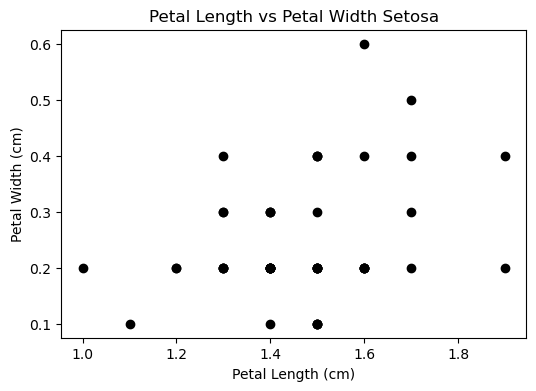

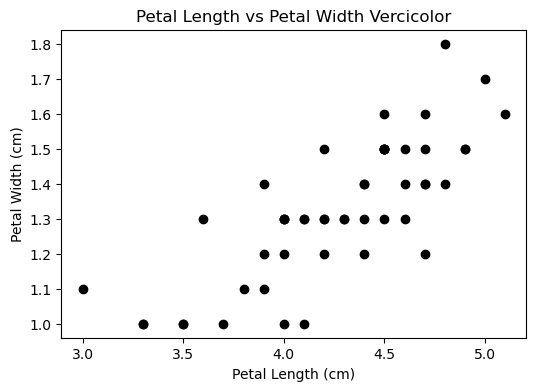

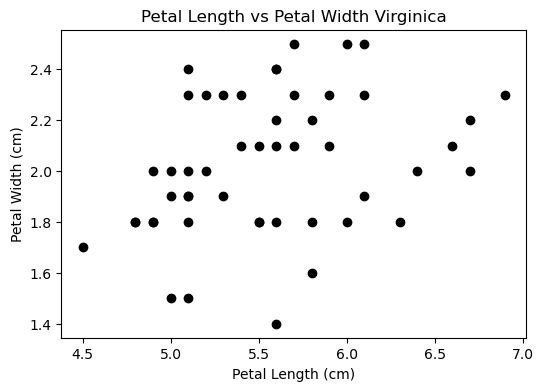

In [14]:
plt.figure(figsize=(6, 4))
plt.scatter(df_s['petal_length'], df_s['petal_width'],c='black')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width Setosa')


plt.figure(figsize=(6, 4))
plt.scatter(df_ve['petal_length'], df_ve['petal_width'],c='black')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width Vercicolor')

plt.figure(figsize=(6, 4))
plt.scatter(df_vi['petal_length'], df_vi['petal_width'],c='black')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width Virginica')
plt.show()

## we can see that there is a positive correlation between petal length and petal width for each type of specie


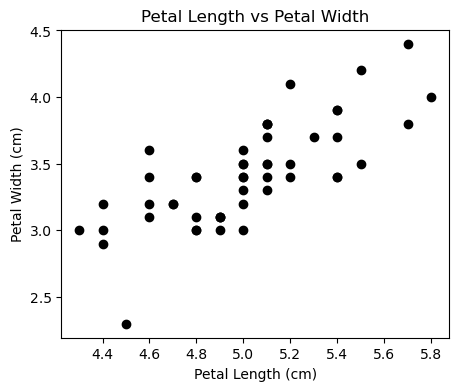

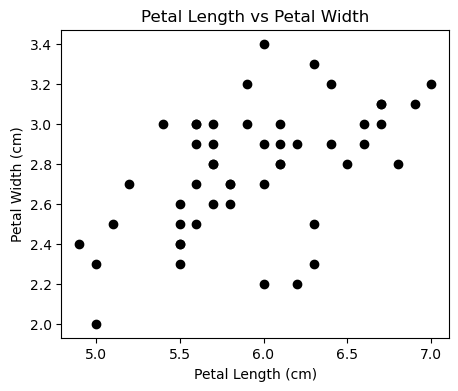

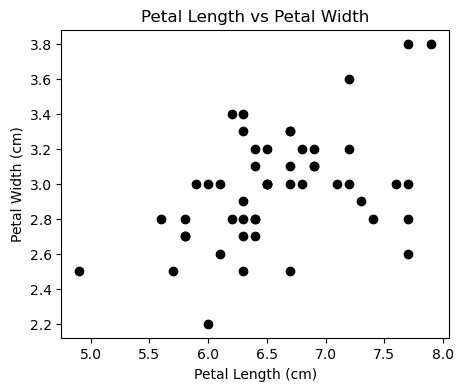

In [15]:
plt.figure(figsize=(5, 4))
plt.scatter(df_s['sepal_length'], df_s['sepal_width'],c='black')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width')

plt.figure(figsize=(5, 4))
plt.scatter(df_ve['sepal_length'], df_ve['sepal_width'],c='black')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width')

plt.figure(figsize=(5, 4))
plt.scatter(df_vi['sepal_length'], df_vi['sepal_width'],c='black')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width')

plt.show()

## we can see that there is a positive correlation between sepal length and sepal width for each type of specie

# Now into the Machine learning model
## We have a categorical column with non-numerical values so we turn them into numerical ones

In [16]:
df['species'] = df['species'].apply(lambda x: 0 if x=='setosa'  else(1 if x=='versicolor' else 2)) 
#changing the categorical values into numerical values


In [17]:
df['species'].unique()

array([0, 1, 2], dtype=int64)

# Since this problem is a classification problem we're going to use one of the most popular classification algorithms which is logistic regression

## We will use softmax  in logistic regression which is used for multiple categories(more than 2) we have 3 different kinds of flowers here

In [18]:
#splitting the data into input and output features
X = df.iloc[:,:4]
y = df.iloc[:,4]

#Dividing the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=10000)  # OvO strategy
model.fit(X_train, y_train)

# Predict and evaluate
y_pred_test = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)

y_pred_train = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)

print(f'Train Accuracy : {train_accuracy*100:.2f}%')
print(f'Test Accuracy : {test_accuracy*100:.2f}%')

Train Accuracy : 98.29%
Test Accuracy : 93.33%
